<center><h1><strong>taudata Analytics</strong></h1></center>
<center><h2><strong><font color="blue">EDA-03: Unsupervised Learning - Pendahuluan Clustering</font></strong></h2></center>
<img alt="" src="images/covers/taudata-cover.jpg" alt="" width="800"/>

<b><center>(C) Taufik Sutanto</center>
<center><h3><font color="blue">https://taudata.blogspot.com/</font></h3></center>
<center><h3><font color="blue">https://www.youtube.com/c/taudataAnalytics</font></h3></center>

In [1]:
# Run this cell ONLY if this notebook run from Google Colab
# Kalau dijalankan lokal (Anaconda/WinPython) maka silahkan install di terminal/command prompt 
# Lalu unduh secara manual file yang dibutuhkan dan letakkan di folder Python anda.
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    !pip install umap-learn
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded


In [2]:
# Importing Modules untuk Notebook ini
import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

<img src="images/clustering_Quotes.png" />

In [3]:
# Kita akan menggunakan 2 data: [1]. Iris dan [2]. Data untuk Studi Kasus (segmentasi kustomer) - di bagian akhir
# load the iris data
df = sns.load_dataset("iris")
X = df[['sepal_length','sepal_width','petal_length','petal_width']].values
C = df['species'].values
print(X.shape)
df.sample(7)

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa
100,6.3,3.3,6.0,2.5,virginica
40,5.0,3.5,1.3,0.3,setosa


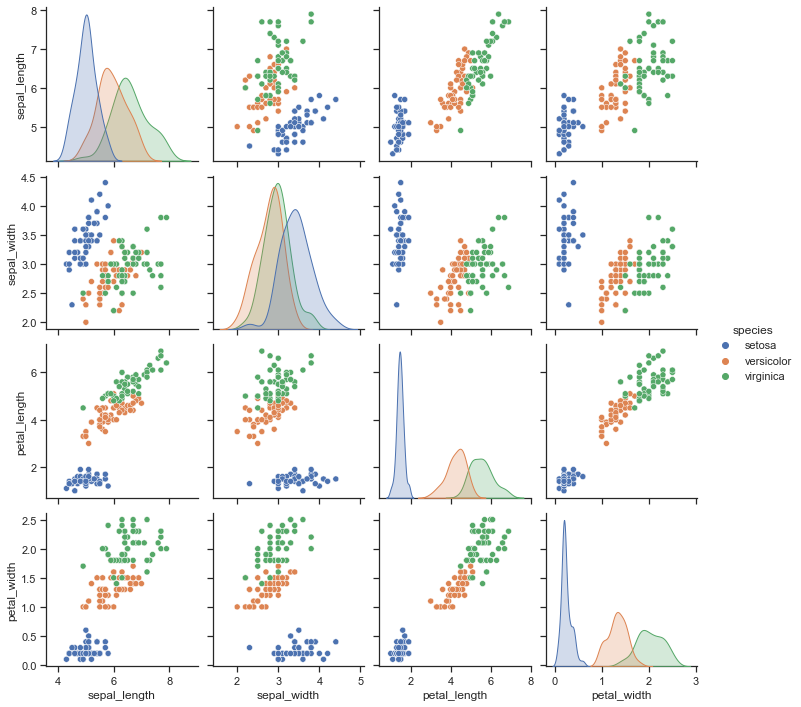

In [4]:
g = sns.pairplot(df, hue="species")

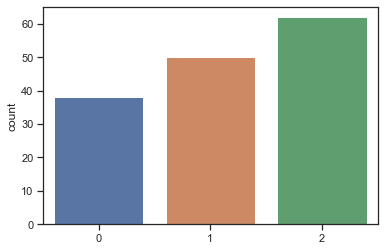

In [5]:
# k-means: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# Hapus "random_state = random_state" jika ingin melihat efek randomized centroid.
k = 3
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, 
                    random_state = 99)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
p= sns.countplot(C_km)

In [6]:
C_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

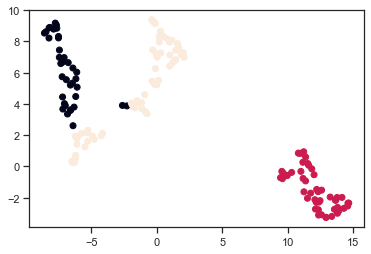

In [7]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km)
plt.show()

# Apa beda label ini dengan klasifikasi ("labels")?

In [8]:
C_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [9]:
km.inertia_

78.85144142614602

Text(0.5, 1.0, 'Elbow curve')

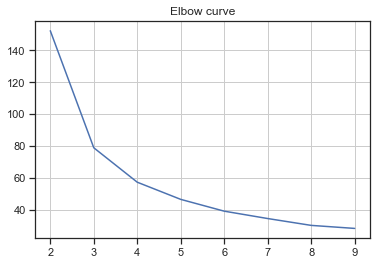

In [10]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

Evaluation of KMeans with k-means++ init
Evaluation of KMeans with random init
Evaluation of MiniBatchKMeans with k-means++ init
Evaluation of MiniBatchKMeans with random init


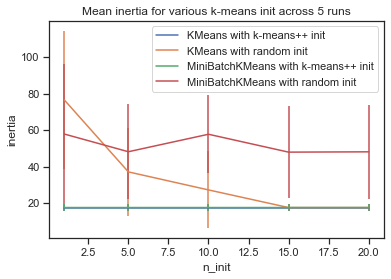

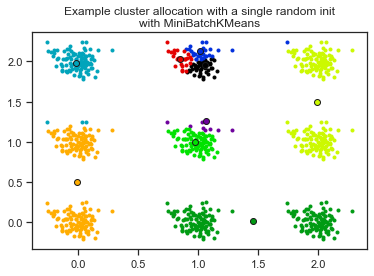

In [11]:
tau.km_initializations()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

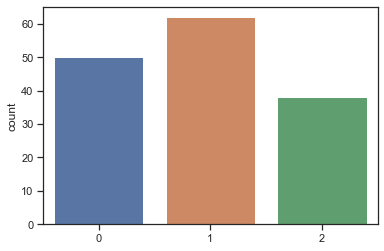

In [12]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
k=3
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(C_kmpp)
C_kmpp[:10]

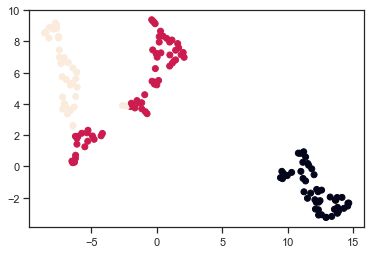

In [13]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp)
plt.show()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

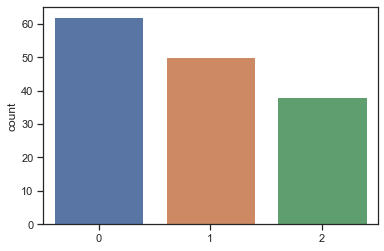

In [14]:
# MiniBatch k-Means 
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
# minibatch "tidak bisa parallel"!!!...
# parameter penting km = batch_size ... pada aplikasi sesungguhnya disarankan "minimal" 3xk
mbkm = cluster.MiniBatchKMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, batch_size = 100, random_state = random_state) 
mbkm.fit(X)
C_mbkm = mbkm.predict(X)
sns.countplot(C_mbkm)
C_mbkm[:10]

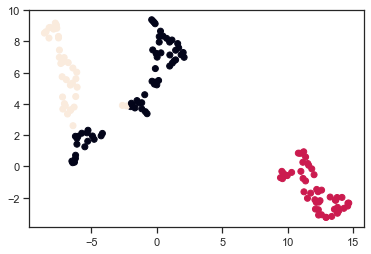

In [15]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkm)
plt.show()

# Minibatch k-Means++

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

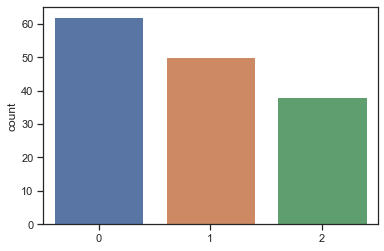

In [16]:
# MiniBatch k-Means++
mbkmPP = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state) 
mbkmPP.fit(X)
C_mbkmPP = mbkmPP.predict(X)
sns.countplot(C_mbkmPP)
C_mbkmPP[:10]

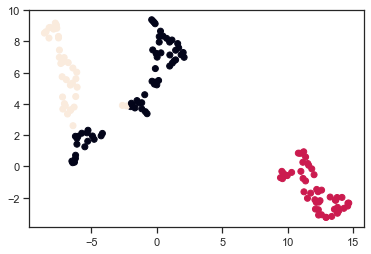

In [17]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkmPP)
plt.show()


## k_means VS MiniBatch k-Means?

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


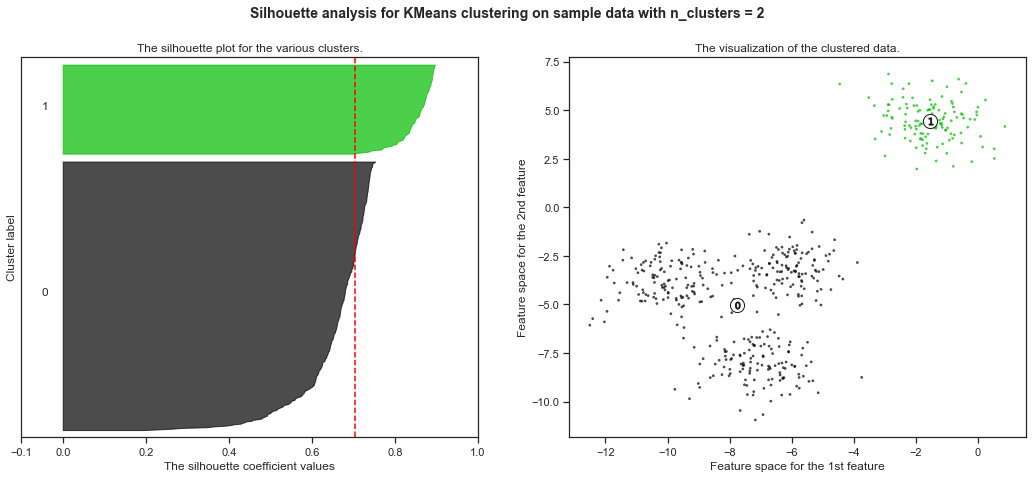

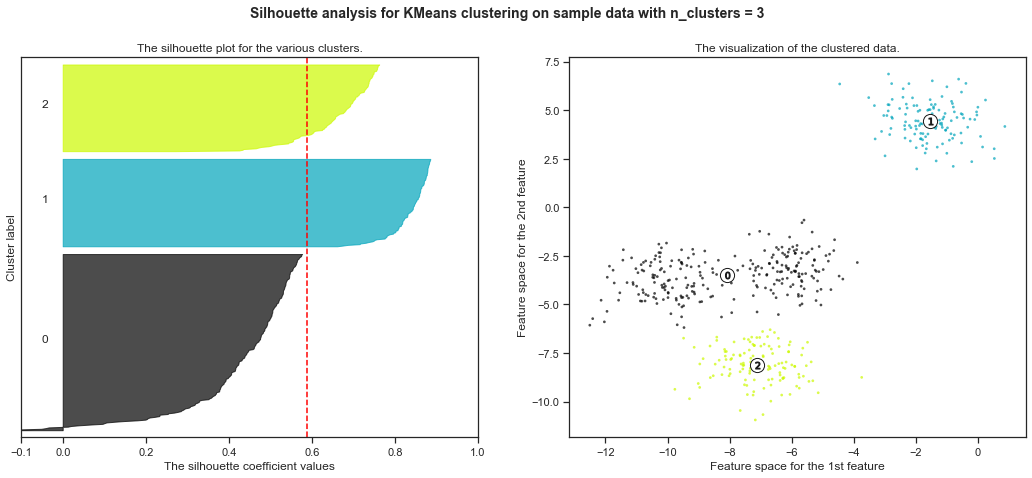

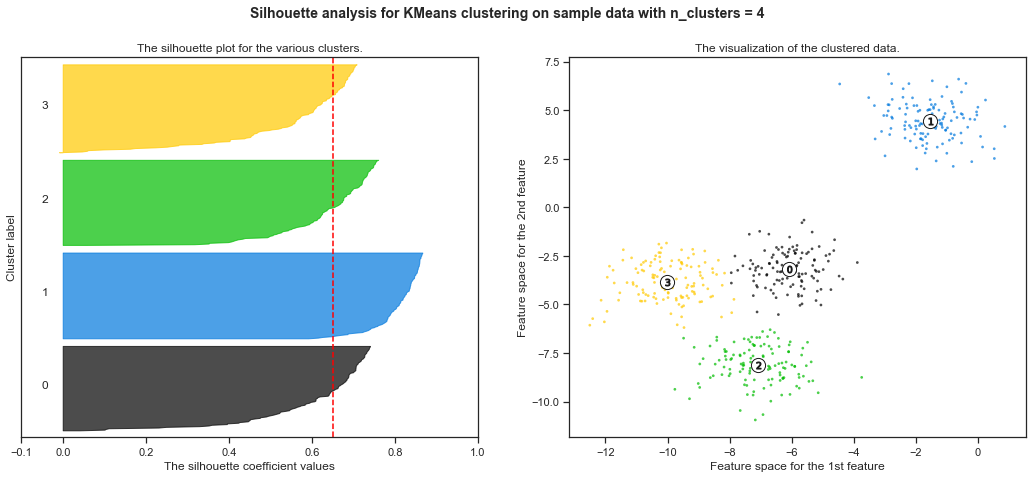

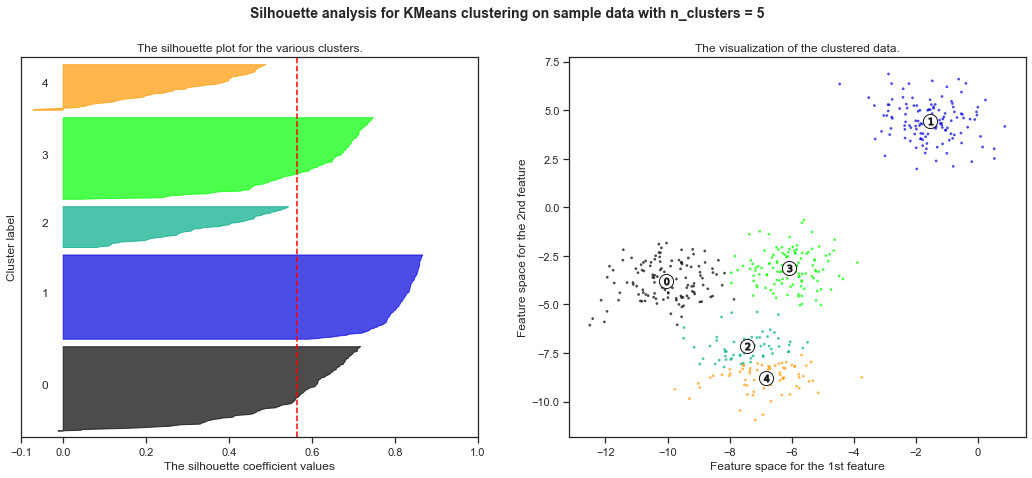

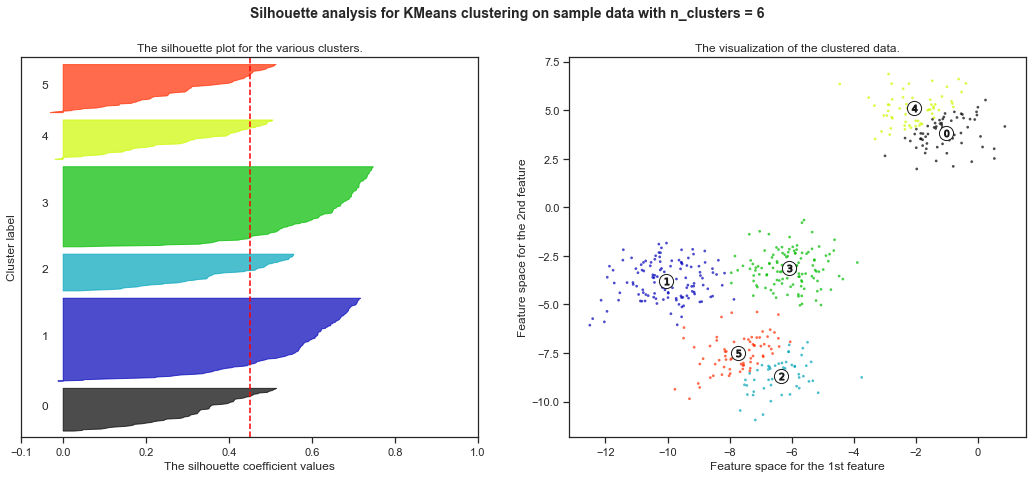

In [18]:
tau.sil_based_optimal_km()

In [19]:
#Evaluasi : Internal . Contoh Silouette Coefficient ==> warning hanya cocok untuk k-means (centroid-based clustering)
Hasil_Clustering = [C_km, C_kmpp, C_mbkm, C_mbkmPP]
for res in Hasil_Clustering:
    print(siluet(X,res), end=', ')
# Bagaimana cara kerja dan interpretasinya?

0.5528190123564102, 0.5528190123564102, 0.5528190123564102, 0.5528190123564102, 

In [20]:
# Bagaimana dengan evaluasi External?
# "C" adalah ground truth/golden standard
for res in Hasil_Clustering:
    print(purity(C,res), end=', ')

0.7514854021988338, 0.7514854021988338, 0.7514854021988339, 0.7514854021988339, 

In [21]:
# Evaluasi External NMI 
for res in Hasil_Clustering:
    print(NMI(C,res), end=', ')
# untuk F-Score ada juga code dan penjelasannya di blog post di atas

0.7581756800057784, 0.7581756800057784, 0.7581756800057785, 0.7581756800057785, 

## Please read more here:  https://tau-data.id/evaluasi-eksternal/

# Cara menarik kesimpulan dari k-Means: Interpretasi

In [22]:
kmPP.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

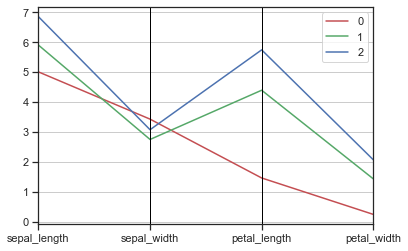

In [23]:
# Evaluasi sebenarnya tidak terlalu penting di Unsupervised learning.
# inilah yang membedakan "clustering" dan "clustering Analysis"
# yang lebih penting adalah interpretasi, tapi Bagaimana?
# contoh k-means++

cols = ['sepal_length','sepal_width','petal_length','petal_width']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b'))
plt.show()

In [24]:
kmPP.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# k-Means Best Practices

* Hati-hati faktor skala data ==> Normalisai/Standardized.
* Hati-hati asumsi topologi data di k-means.
* Nope... k-Means tidak bisa untuk data Kategori
* Sangat tidak disarankan untuk data tidak terstruktur berskala besar. Kalau datanya tidak besar cukup ganti jarak euclid dengan similarity Cosine.


# End of Module 

<hr />